<a href="https://colab.research.google.com/github/MayureshOP-max/DataAnalytics/blob/main/Day6_zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
#Calculate mean and std of Glucose
glucose_mean = df['Glucose'].mean()
glucose_std = df['Glucose'].std()

In [ ]:
print(f"Mean of Glucose: {glucose_mean}")
print(f"Standard Deviation of Glucose: {glucose_std}")

Mean of Glucose: 120.89453125
Standard Deviation of Glucose: 31.97261819513622


In [ ]:
#Calculate zscore for glucose level of 168 using manula method

glucose_value = 168
z_score_168_manual = (glucose_value - glucose_mean) / glucose_std
print(f"Z-score for Glucose level 168 (Manual): {z_score_168_manual}")

Z-score for Glucose level 168 (Manual): 1.4733065794769926


In [ ]:
#this will add a column for the z-score of glucose for each record

df['Glucose_ZScore'] = zscore(df['Glucose'])
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_ZScore  
0                       0.627   50        1      

In [ ]:
#Find th row index where glucose = 168

# df['Glucose'] == glucose_value = Returns 'True' where Glucose = 168
# df[ now gets the actual record for 168
   # . index returns the indices of rowsmatching this condition]0

row_index = df[df['Glucose'] == glucose_value].index


In [ ]:
#Now we extratc the first row from Glucose_zscore DF where Glucose = 168
#Hence row index[0]... Remember, we may have multiple rows matching 168
z_score_168_using_function = df['Glucose_ZScore'].iloc[row_index[0]]
print(f"Z-score for Glucose level 168 (Using Function): {z_score_168_using_function}")

Z-score for Glucose level 168 (Using Function): 1.4742667011686503


In [ ]:

#Calclate the pecentile for zscore
percentile_168 = stats.norm.cdf(z_score_168_manual)*100
print(f"Percentile for Glucose level 168: {percentile_168}%")

Percentile for Glucose level 168: 92.96658063066623%


In [ ]:
#Find the z-score at the 30th percentile
z_score_30 = stats.norm.ppf(0.30)
print(f"Z-score at the 30th percentile: {z_score_30}")

Z-score at the 30th percentile: -0.5244005127080409


In [ ]:
#Calculate the corresponding Glucose value for the zscore of the 30th percenile
glucose_value_30 = glucose_mean + z_score_30 * glucose_std
print(f"Glucose value corresponding to the 30th percentile: {glucose_value_30}")

Glucose value corresponding to the 30th percentile: 104.12807387585212


In [ ]:
#Given z-score of 2.8 calculate the corresponding Glucose level
z_score_given = 2.8
glucose_value_given = glucose_mean + z_score_given * glucose_std
print(f"Glucose value corresponding to the given z-score: {glucose_value_given}")

Glucose value corresponding to the given z-score: 210.4178621963814


In [ ]:
#calculate percentile for the z-score of 2.8
percentile_given = stats.norm.cdf(z_score_given)*100
print(f"Percentile for the given z-score: {percentile_given}%")

Percentile for the given z-score: 99.7444869669572%


# **TIPS DATASET**

In [ ]:
data = pd.read_csv("/content/tips.csv")

In [ ]:
#extract the bill series
bill_series = data['total_bill']
total_bill_series = data['total_bill']
total_bill_series

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [ ]:
#calc mean and std
mu, std = total_bill_series.mean(), total_bill_series.std()

In [ ]:
z_scores = (total_bill_series - mu) / std

Text(0.5, 1.0, 'Histogram of Total Bill')

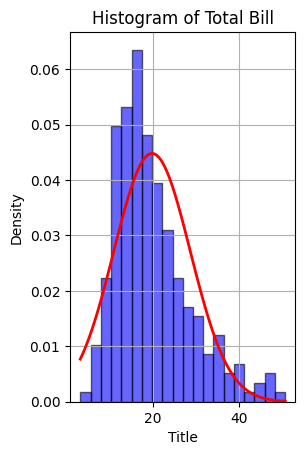

In [ ]:
#Histogram
plt.subplot(1,2,1)
plt.hist(total_bill_series, bins = 20,density =True, alpha = 0.6, color = 'b', edgecolor= 'black')
#fit a normal distributuon to the dat
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth = 2)
plt.xlabel('Title')
plt.ylabel('Density')
plt.grid(True)
plt.title('Histogram of Total Bill')

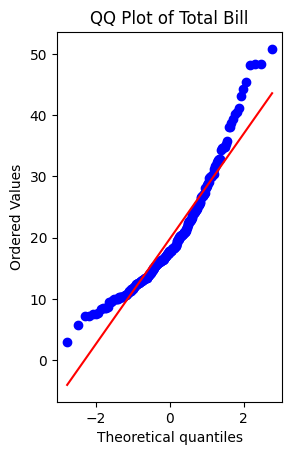

In [ ]:
#QQ plot
plt.subplot(1,2,2)
stats.probplot(total_bill_series, dist = 'norm', plot = plt)
plt.title('QQ Plot of Total Bill')
plt.show()

(array([0.00171695, 0.0103017 , 0.02232036, 0.04979156, 0.05322546,
        0.06352717, 0.04807461, 0.03948986, 0.03090511, 0.02232036,
        0.0171695 , 0.01545255, 0.00858475, 0.01201865, 0.00515085,
        0.0068678 , 0.00171695, 0.0034339 , 0.00515085, 0.00171695]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

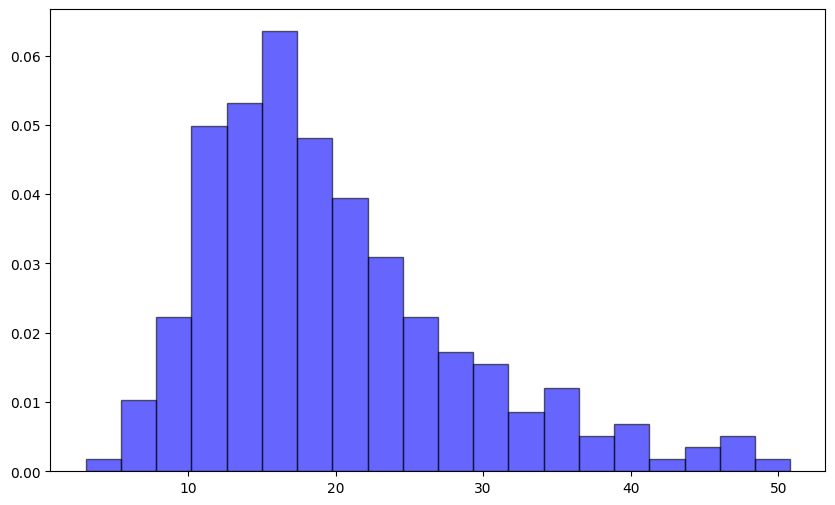

In [ ]:
#Plot graph showing mean +-3 SD
plt.figure(figsize =(10,6))
plt.hist(total_bill_series, bins = 20, density = True, alpha = 0.6, color = 'b', edgecolor = 'black')

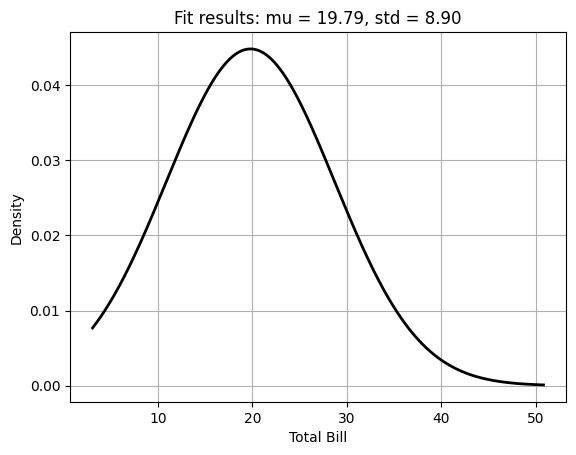

In [ ]:
#Fit a normal ditribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 1000)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)

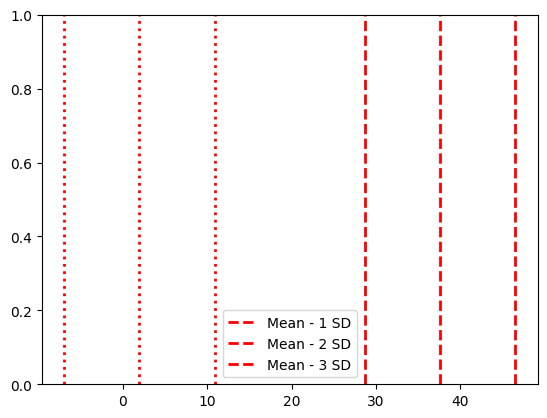

In [ ]:
#PLot mean +-3 SD
for i in range(1,4):
  plt.axvline(mu + std * i, color = 'r', linestyle = '--', linewidth = 2, label = f"Mean - {i} SD")
  plt.axvline(mu - std * i, color = 'r', linestyle = ':', linewidth = 2)
plt.legend()
plt.show()

In [ ]:
#check if mean +- 1 sd, mean=linewidth +-2 SD and mean+-3 SD satisfy the empirical rule
within_1sd = (z_scores >= -1) & (z_scores <= 1)
within_2sd = (z_scores >= -2) & (z_scores <= 2)
within_3sd = (z_scores >= -3) & (z_scores <= 3)

percentage_within_1sd = (within_1sd.sum() / len(z_scores)) * 100
percentage_within_2sd = (within_2sd.sum() / len(z_scores)) * 100
percentage_within_3sd = (within_3sd.sum() / len(z_scores)) * 100

print(f"Percentage of values within 1 SD: {percentage_within_1sd:.2f}%")
print(f"Percentage of values within 2 SD: {percentage_within_2sd:.2f}%")
print(f"Percentage of values within 3 SD: {percentage_within_3sd:.2f}%")

Percentage of values within 1 SD: 72.13%
Percentage of values within 2 SD: 94.26%
Percentage of values within 3 SD: 98.36%


In [ ]:
#Create a df to store
result_df = pd.DataFrame({
    'total_bill':total_bill_series,
    'z_scores':z_scores,
    'within_1sd':within_1sd,
    'within_2sd':within_2sd,
    'within_3sd':within_3sd
})

print(result_df.head())

   total_bill  z_scores  within_1sd  within_2sd  within_3sd
0       16.99 -0.314066        True        True        True
1       10.34 -1.061054       False        True        True
2       21.01  0.137497        True        True        True
3       23.68  0.437416        True        True        True
4       24.59  0.539635        True        True        True


In [ ]:
if os.path.exists('deletethis-2.csv'):
  os.remove('deletethis-2.csv')
result_df.to_csv('deletethis-2.csv', index = False)


In [ ]:
#Filter outliers
outliers = result_df[(result_df['z_scores']< -3) | result_df['z_scores']> -3]
#Outlier z-score box plot

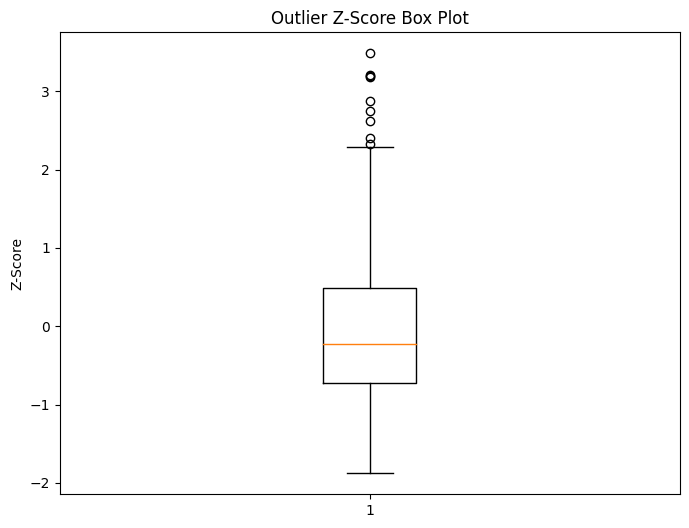

In [ ]:
plt.figure(figsize = (8,6))
vert = False
# marker = '*': Sets the marker style for the outliers to a star ('*').

plt.boxplot(result_df['z_scores'])
plt.ylabel('Z-Score')
plt.title('Outlier Z-Score Box Plot')
plt.show()